## Plot t-SNE projections

In [22]:
import os
os.chdir('/notebooks/src/CIFAR-10/models_ipynb')
import numpy as np
tsne_features = np.load('9_tsne_inception_features.npz')['tsne_features']

Using TensorFlow backend.


data loaded


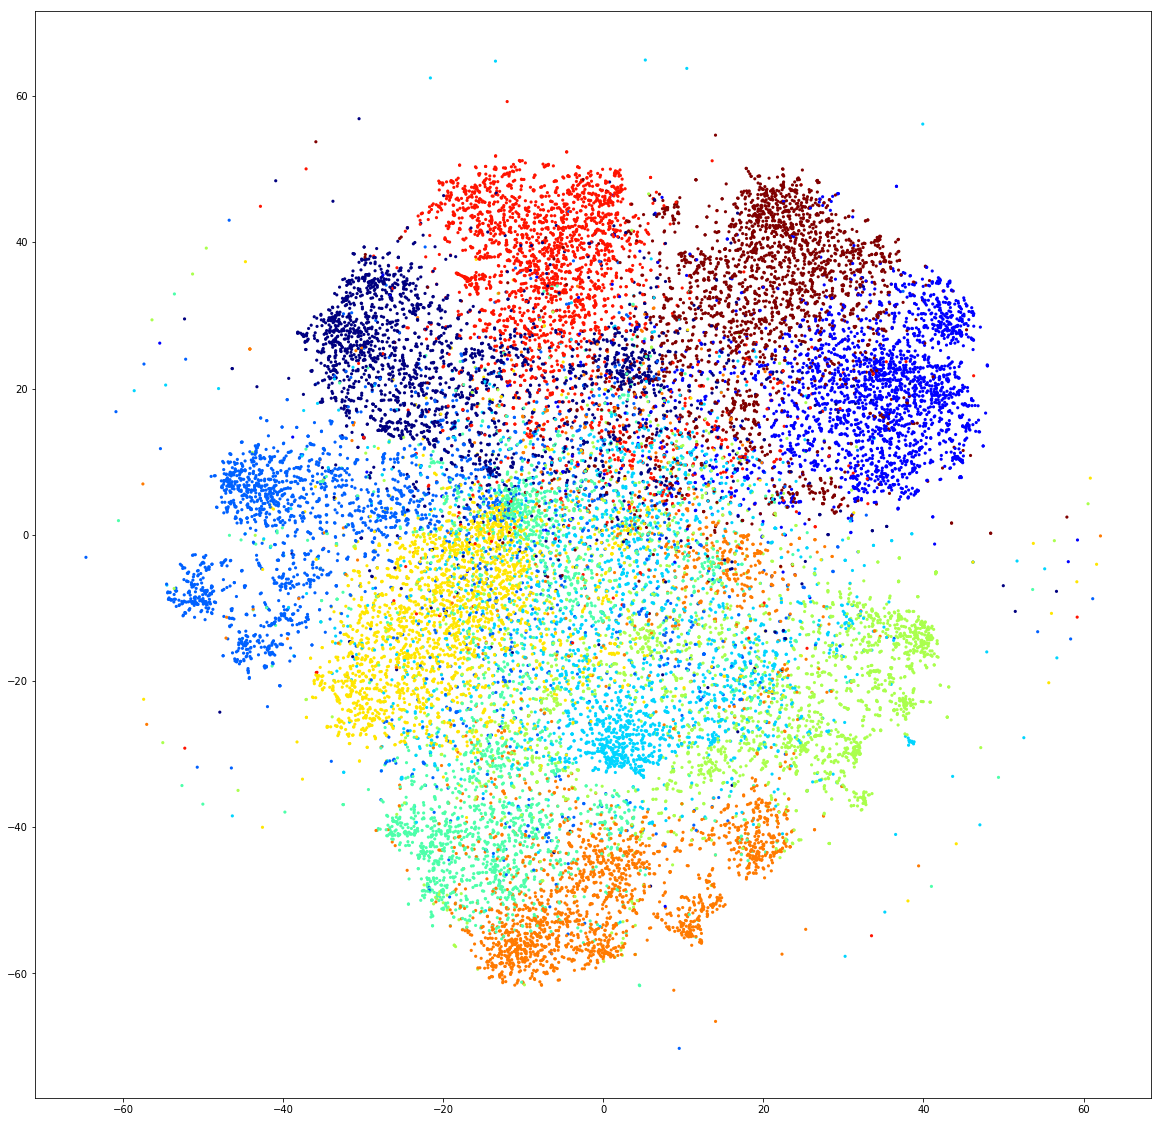

In [23]:
from keras.datasets import cifar10
(_, y_train), (_, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
print('data loaded')

y_train[0:25000].shape

tsne_features[:,0].shape

tsne_features[:,1].shape

y_train[4]/10.0

from matplotlib import cm

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=(y_train[0:25000]/10.0), s=10, edgecolors='none', cmap=cm.jet)
plt.show()

## Classification based on the transformed features

### Boosting

In [5]:
!pip install XGBoost

  Using cached xgboost-0.6a2.tar.gz
  Running setup.py bdist_wheel for XGBoost ... done
  Stored in directory: /root/.cache/pip/wheels/5e/c1/d6/522af54e5cc001fad4dd855117f8bf61b11d56443e06672e26
Successfully built XGBoost


In [59]:
#classifiers
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
#train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


In [25]:

# Grab data
tsne_features.shape
tsne_target = y_train[0:25000]

#Create test set
train_features = tsne_features[:20000]
train_target = tsne_target[:20000]
test_features = tsne_features[20000:]
test_target = tsne_target[20000:]

In [67]:
xg_pipe = Pipeline([
    ('xg', AdaBoostClassifier()),
])
xg_param = {
#     'xg__max_depth': [2,3,4,5],
    'xg__learning_rate':np.linspace(0.01,0.1,10),
    'xg__n_estimators':[  50,  100,  150,  200,  250,  300,  350,  400,  450,
        500,  550,  600,  650,  700],
}


In [ ]:
xg_gs = GridSearchCV(xg_pipe, param_grid=xg_param, cv=5)
xg_gs.fit(train_features, train_target)

In [70]:
print('DONE')

DONE


In [77]:
# Instantiate
xg = xgb.XGBClassifier(max_depth=3, learning_rate=0.08, n_estimators=700)
xg.fit(train_features, train_target)
# score
xg.score(test_features, test_target)

0.72199999999999998

## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_pipe = Pipeline([
    ('xg', RandomForest()),
])
rf_param = {
#     'xg__max_depth': [2,3,4,5],
    'xg__learning_rate':np.linspace(0.01,0.1,10),
    'xg__n_estimators':[  50,  100,  150,  200,  250,  300,  350,  400,  450,
        500,  550,  600,  650,  700],
}


In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_param, cv=5)
rf_gs.fit(train_features, train_target)

In [81]:
# Instantiate
rf = RandomForestClassifier(n_estimators=500)
rf.fit(train_features, train_target)
# score
rf.score(test_features, test_target)

0.72940000000000005

### Will try linear SVC, Kneighbors, and SGD classifier

In [10]:
#classifiers
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
#train_test_split
from sklearn.preprocessing import StandardScaler


In [14]:
# Grab data
tsne_features.shape
tsne_target = y_train[0:25000]

#Create test set
train_features = tsne_features[:20000]
train_target = tsne_target[:20000]
test_features = tsne_features[20000:]
test_target = tsne_target[20000:]

### LinearSVC

In [22]:
# Instantiate
linearsvc = LinearSVC()
# fit
linearsvc.fit(train_features, train_target)
# score
linearsvc.score(test_features, test_target)

0.2384

### KNeighbors

In [159]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [177]:
knc_pipe = Pipeline([
    ('kncclass1', KNeighborsClassifier()),
])

In [174]:
np.linspace(1,50,50)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.])

In [168]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [178]:
knc_param = {
    'kncclass1__n_neighbors': np.arange(1, 50),
}

In [179]:
knc_gs = GridSearchCV(knc_pipe, param_grid=knc_param, cv=5)

knc_gs.fit(train_features, train_target)

In [184]:
knc_gs.best_estimator_

Pipeline(memory=None,
     steps=[('kncclass1', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform'))])

In [181]:
knc_gs.score(train_features, train_target)

0.75475000000000003

In [183]:
knc_gs.score(test_features, test_target)

0.73040000000000005

In [185]:

# Instantiate
knclass = KNeighborsClassifier(n_neighbors=18)
# fit
knclass.fit(train_features, train_target)
# score
knclass.score(test_features, test_target)

0.73040000000000005

In [186]:
from sklearn.metrics import classification_report
target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(test_target, knclass.predict(test_features), target_names=target_names))

             precision    recall  f1-score   support

   airplane       0.70      0.78      0.74       502
 automobile       0.83      0.89      0.86       537
       bird       0.78      0.65      0.71       473
        cat       0.55      0.54      0.55       511
       deer       0.60      0.66      0.63       481
        dog       0.73      0.64      0.68       486
       frog       0.69      0.80      0.74       499
      horse       0.80      0.75      0.77       503
       ship       0.80      0.79      0.80       495
      truck       0.84      0.78      0.81       513

avg / total       0.73      0.73      0.73      5000



In [55]:
!pip install seaborn --quiet
!pip install widgetsnbextension --quiet
!jupyter nbextension enable --py --sys-prefix widgetsnbextension --quiet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.neighbors import KNeighborsClassifier

Enable an nbextension in frontend configuration.

Usage
    jupyter nbextension enable [--system|--sys-prefix]

Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--python
    Install from a Python package
--sys-prefix
    Use sys.prefix as the prefix for installing nbextensions (for environments, packaging)
--user
    Apply the operation only for the given user
--debug
    set log level to logging.DEBUG (maximize logging output)
--py
    Install from a Python package
--system
    Apply the operation system-wide
--section=<Unicode> (ToggleNBExtensionApp.section)
    Default: 'notebook'
    Which config section to add the extension to, 'common' will affect all
    pages.

To see all available configurables, use `--help-all`

Bad config encountered during initialization:
Unrecognized flag: '--quiet'


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier


In [56]:
df = pd.DataFrame(data = train_features, columns=['component_1', 'component_2'])

df['class'] = pd.Series(train_target)

In [187]:
import imp
plotter = imp.load_source('plotter', '../knn_plotter.py')
from plotter import KNNBoundaryPlotter

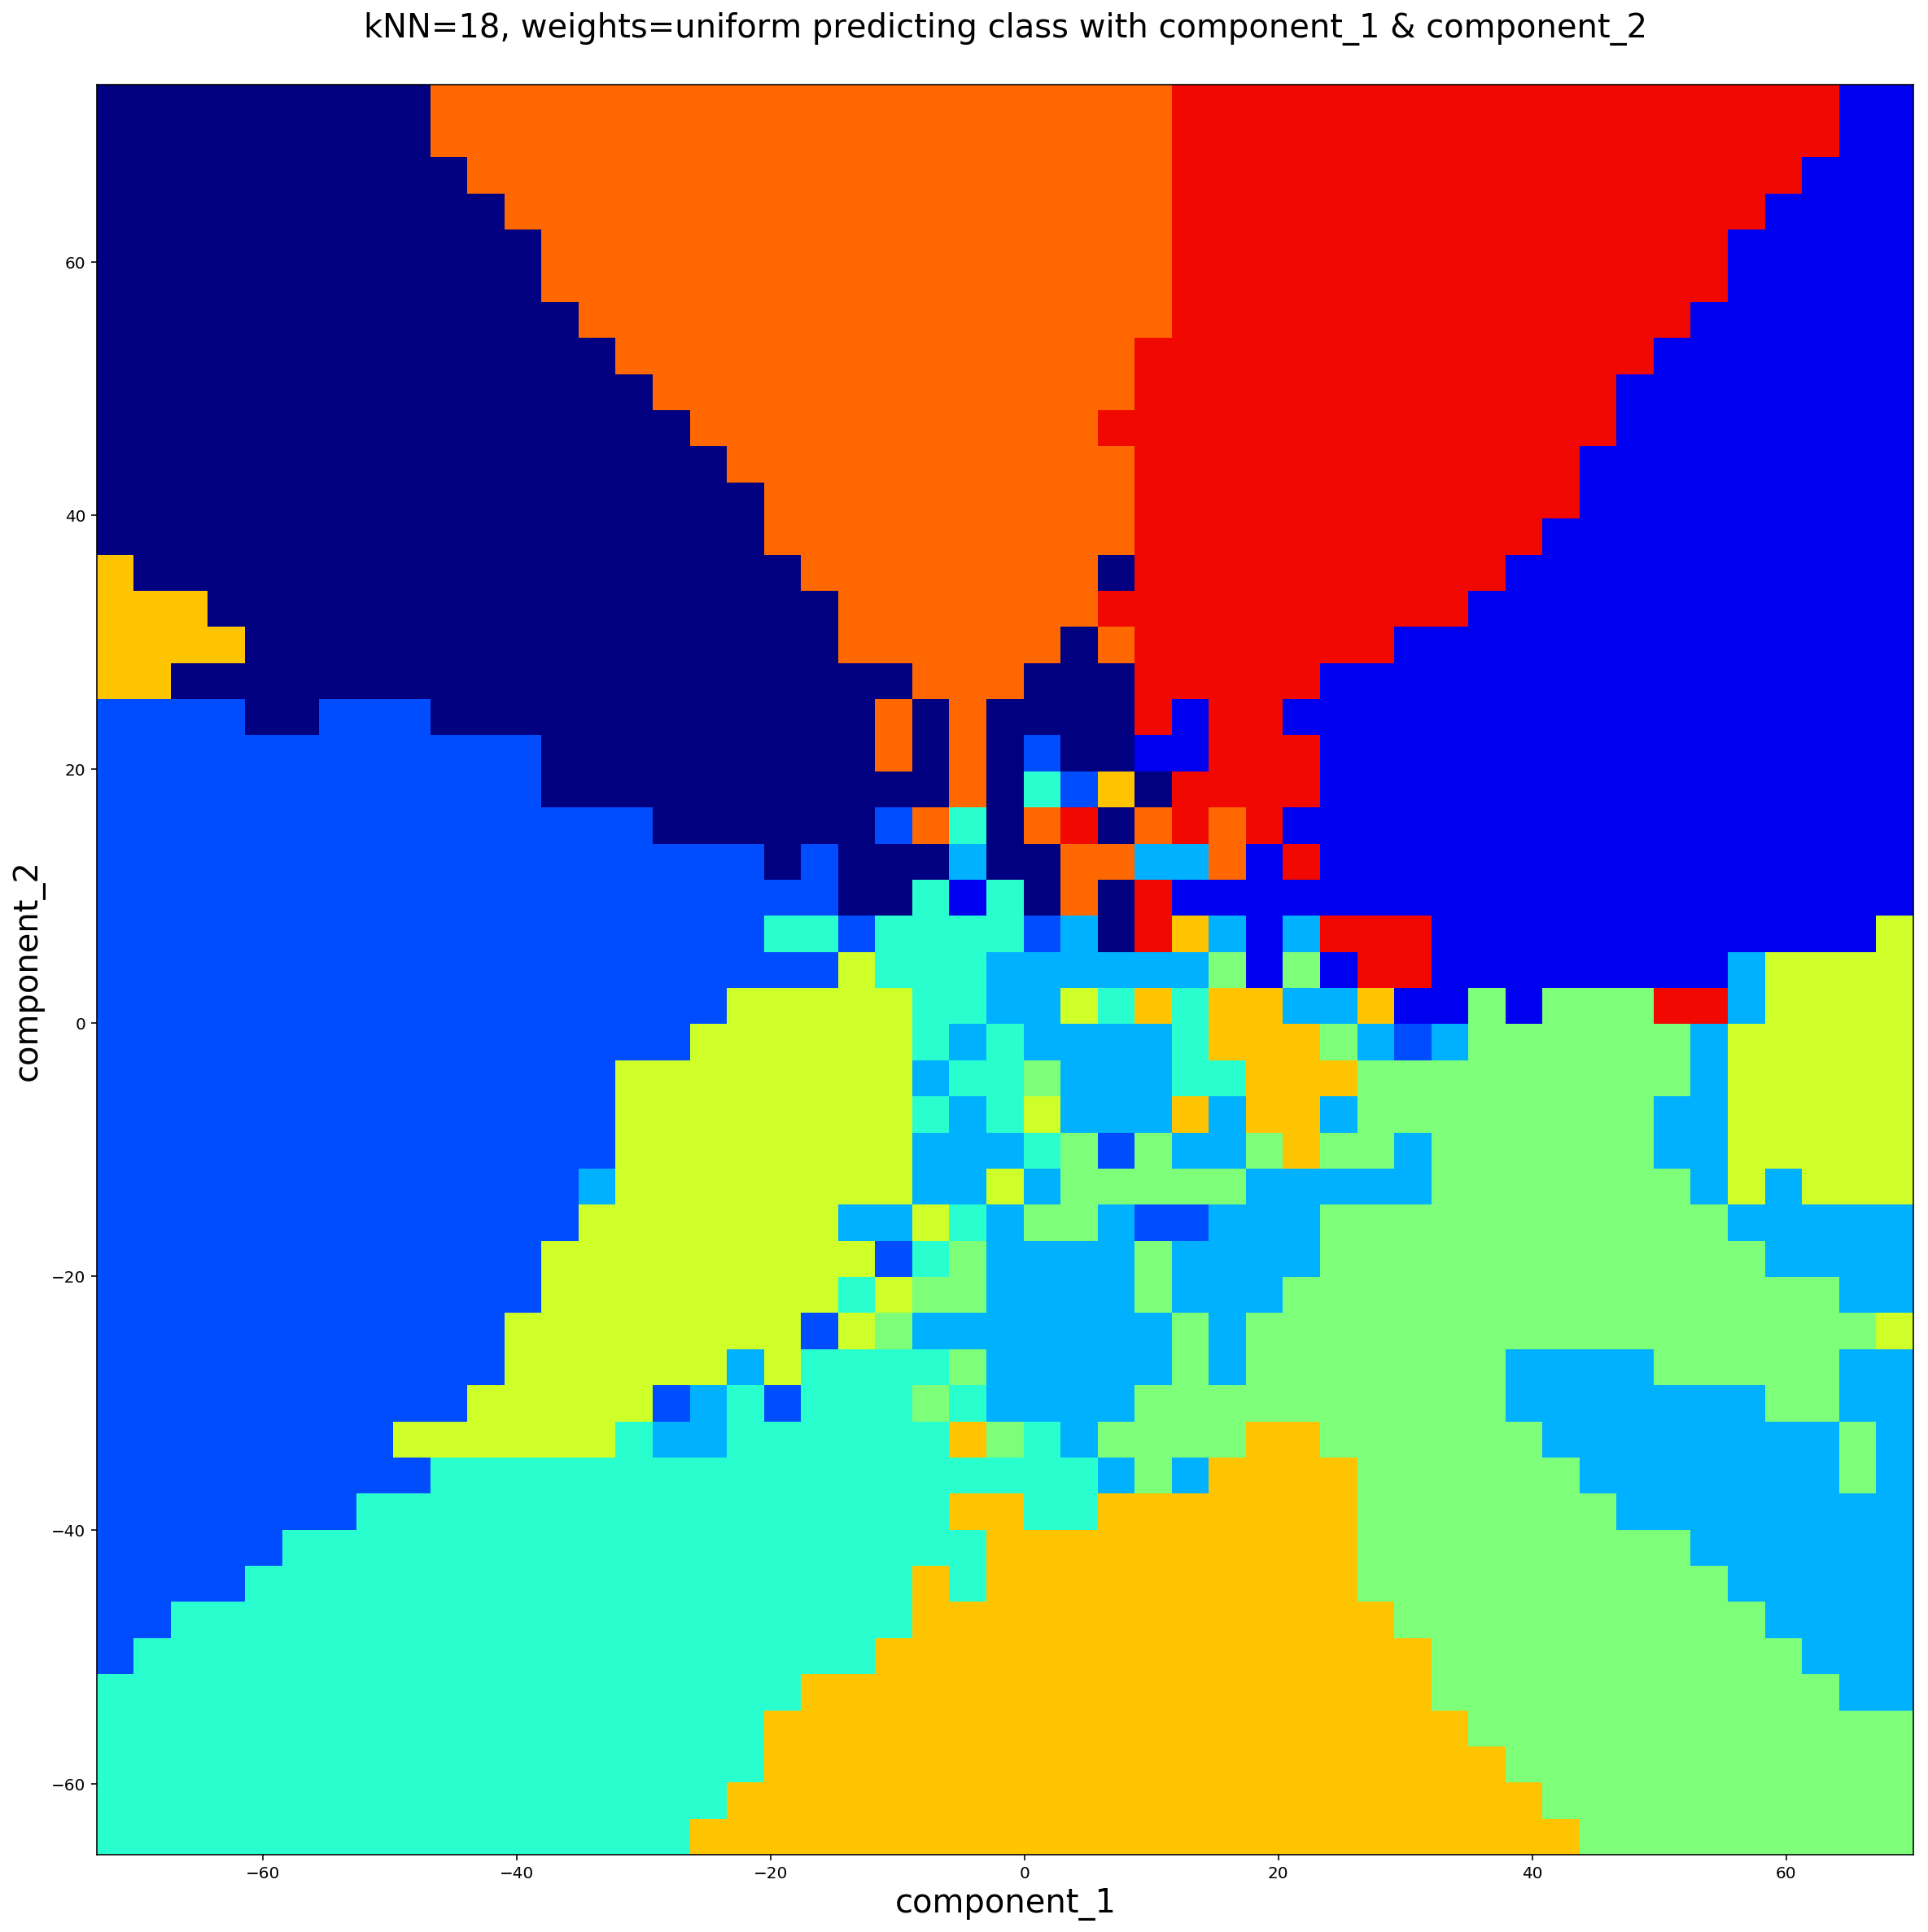

In [188]:
kbp = KNNBoundaryPlotter(df, 'component_1', 'component_2', 'class', nn_range=range(1,101))
kbp.knn_mesh_runner()
kbp.knn_interact()

In [ ]:
kbp.knn_boundary_plotter(5, 'uniform')

In [110]:
sns.xkcd_palette(['windows blue', 'amber'])

seaborn.palettes._ColorPalette

In [114]:
from matplotlib import cm

In [120]:
cm.jet([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

array([[ 0.        ,  0.        ,  0.5       ,  1.        ],
       [ 0.        ,  0.        ,  0.9456328 ,  1.        ],
       [ 0.        ,  0.3       ,  1.        ,  1.        ],
       [ 0.        ,  0.69215686,  1.        ,  1.        ],
       [ 0.16129032,  1.        ,  0.80645161,  1.        ],
       [ 0.49019608,  1.        ,  0.47754586,  1.        ],
       [ 0.80645161,  1.        ,  0.16129032,  1.        ],
       [ 1.        ,  0.77051561,  0.        ,  1.        ],
       [ 1.        ,  0.40740741,  0.        ,  1.        ],
       [ 0.9456328 ,  0.02977487,  0.        ,  1.        ]])

In [119]:
[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

SyntaxError: invalid syntax (<ipython-input-119-cb64637a0ce4>, line 1)

### SGDClassifier

In [24]:
# Instantiate
sgdclass = SGDClassifier()
# fit
sgdclass.fit(train_features, train_target)
# score
sgdclass.score(test_features, test_target)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.49780000000000002

In [100]:
np.unique(train_target/10.0).shape

(10,)

In [106]:
np.unique(train_target/10.0)[3]

0.29999999999999999

In [109]:
cm.jet([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

array([[ 0.        ,  0.        ,  0.5       ,  1.        ],
       [ 0.        ,  0.        ,  0.9456328 ,  1.        ],
       [ 0.        ,  0.3       ,  1.        ,  1.        ],
       [ 0.        ,  0.69215686,  1.        ,  1.        ],
       [ 0.16129032,  1.        ,  0.80645161,  1.        ],
       [ 0.49019608,  1.        ,  0.47754586,  1.        ],
       [ 0.80645161,  1.        ,  0.16129032,  1.        ],
       [ 1.        ,  0.77051561,  0.        ,  1.        ],
       [ 1.        ,  0.40740741,  0.        ,  1.        ],
       [ 0.9456328 ,  0.02977487,  0.        ,  1.        ]])